Project Submission of **Lore Eugene Abing**

### Overview

This project offers a hands-on opportunity to apply multiple regression modeling techniques in real-world contexts. It stems from a personal quest to understand and address practical challenges, similar to real-life scenarios.

The central objectives encompass gaining insights into how various features impact house or property prices, providing decision support, enhancing data science skills, and interpreting model results. By undertaking this project, I aspire to advance as a data scientist, developing proficiency in unraveling the intricate relationships between different features and their effects on real estate prices.

### Dataset Summary

The dataset, comprising real estate transactions in King County, Washington, USA, between 2014 and 2015, offers a substantial sample of 21,597 entries for analysis. It encompasses diverse property features, location data, property condition, and historical information. Notably, not all available features were used in the analysis; instead, a deliberate feature selection process was employed to optimize the predictive model. The focus is on extracting the most influential factors impacting property prices, providing users with actionable insights for informed investment decisions.

This dataset serves as a valuable resource for understanding the King County real estate market and empowers users to make data-driven choices. Despite the selective use of features, the project is dedicated to achieving the best results by leveraging the chosen variables to deliver a robust and informative solution for investors, builders, and homebuyers seeking success in the dynamic King County real estate landscape.

---
# King County Real Estate Pricing and Investment Advisor

### Business Problem

The "King County Real Estate Pricing and Investment Advisor" project addresses a critical challenge in the dynamic King County, Washington real estate market. In the quest for informed investment decisions, the primary concern is to decipher the multifaceted factors that shape property prices. The project aims to unlock this enigma by leveraging a robust regression analysis that delves into the intricacies of real estate dynamics within King County.

King County's real estate landscape is characterized by its diversity and volatility, making it imperative for investors, builders, and homebuyers to have access to reliable insights. The regression analysis results offer a clear roadmap to this end. Notably, while many factors play a role, living space, waterfront views, property condition, grade, and year built emerge as pivotal influencers of property prices.

The project's primary objective is to provide a comprehensive "King County Real Estate Pricing and Investment Advisor" model, empowered by regression analysis, which offers actionable insights into these key factors. By doing so, it empowers stakeholders to navigate this complex market with confidence, make well-informed investment choices, and create strategies for successful real estate endeavors. This solution aligns perfectly with the need for data-driven decision-making and sets the stage for thriving in King County's vibrant real estate arena.


### Feature Columns
- id - Unique ID for each home sold
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- condition - An index from 1 to 5 on the condition of the apartment,
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- yr_built - The year the house was initially built

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

### Data

In [9]:
df  = pd.read_csv('kc_house_data.csv')

In [10]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [11]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

> Narrowing down the columns based on the Project 2 suggestions if you're feeling overwhelmed.

In [12]:
# Checking the data
data  = df[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built']]
data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,2004


### Cleaning and Preparing

In [13]:
# Checking duplicates
data[data.duplicated(keep=False, subset=['id'])]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
93,6021501535,430000.0,3,1.50,1580,5000,1.0,0.0,3,8,1939
94,6021501535,700000.0,3,1.50,1580,5000,1.0,0.0,3,8,1939
313,4139480200,1380000.0,4,3.25,4290,12103,1.0,0.0,3,11,1997
314,4139480200,1400000.0,4,3.25,4290,12103,1.0,0.0,3,11,1997
324,7520000520,232000.0,2,1.00,1240,12092,1.0,NaN,3,6,1922
...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,502000.0,4,2.50,2680,5539,2.0,NaN,3,8,2013
20763,6300000226,240000.0,4,1.00,1200,2171,1.5,0.0,3,7,1933
20764,6300000226,380000.0,4,1.00,1200,2171,1.5,0.0,3,7,1933
21564,7853420110,594866.0,3,3.00,2780,6000,2.0,0.0,3,9,2013


In [14]:
# Removing duplicates and retaining the first row for each duplicate entry.
data = data.drop_duplicates(keep='first', subset=['id'])

In [15]:
# making ID as index
data.set_index('id', drop=True, append=False, inplace=True)
data.index.name = None

In [16]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009
6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014
1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009
291310100,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,2004


In [17]:
# Checking the info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 7129300520 to 1523300157
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21420 non-null  float64
 1   bedrooms     21420 non-null  int64  
 2   bathrooms    21420 non-null  float64
 3   sqft_living  21420 non-null  int64  
 4   sqft_lot     21420 non-null  int64  
 5   floors       21420 non-null  float64
 6   waterfront   19067 non-null  float64
 7   condition    21420 non-null  int64  
 8   grade        21420 non-null  int64  
 9   yr_built     21420 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.8 MB


In [18]:
# Check data missing
data.isnull().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2353
condition         0
grade             0
yr_built          0
dtype: int64

In [19]:
data['waterfront'].unique()

array([nan,  0.,  1.])

In [20]:
# It seems like it's a categorical that answers if the proerty is waterfront or not
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [21]:
# So filling NA as 0 and converting 'waterfront' to an integer as decimals are unnecessary
data['waterfront'] = data['waterfront'].fillna(0).astype(int)

In [22]:
data.shape

(21420, 10)

In [23]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,3.410784,7.662792,1971.092997
std,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.650035,1.171971,29.387141
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1952.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


Noticed a weird number in the bedrooms column, we'll try to investigate

In [24]:
# Checking
data['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [25]:
# Noticed a different number which is 33, checking details
data[data['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
2402100895,640000.0,33,1.75,1620,6000,1.0,0,5,7,1947


In [26]:
# One house has 33 bedrooms and sqft_living of 1620. This is below the mean
# It is unlikely this house has 33 bedrooms, possibly a recording error
data['bedrooms'] = data['bedrooms'].replace(33, 3)

In [27]:
# Rechecking
data[data['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built


**Continues vs Categorical**

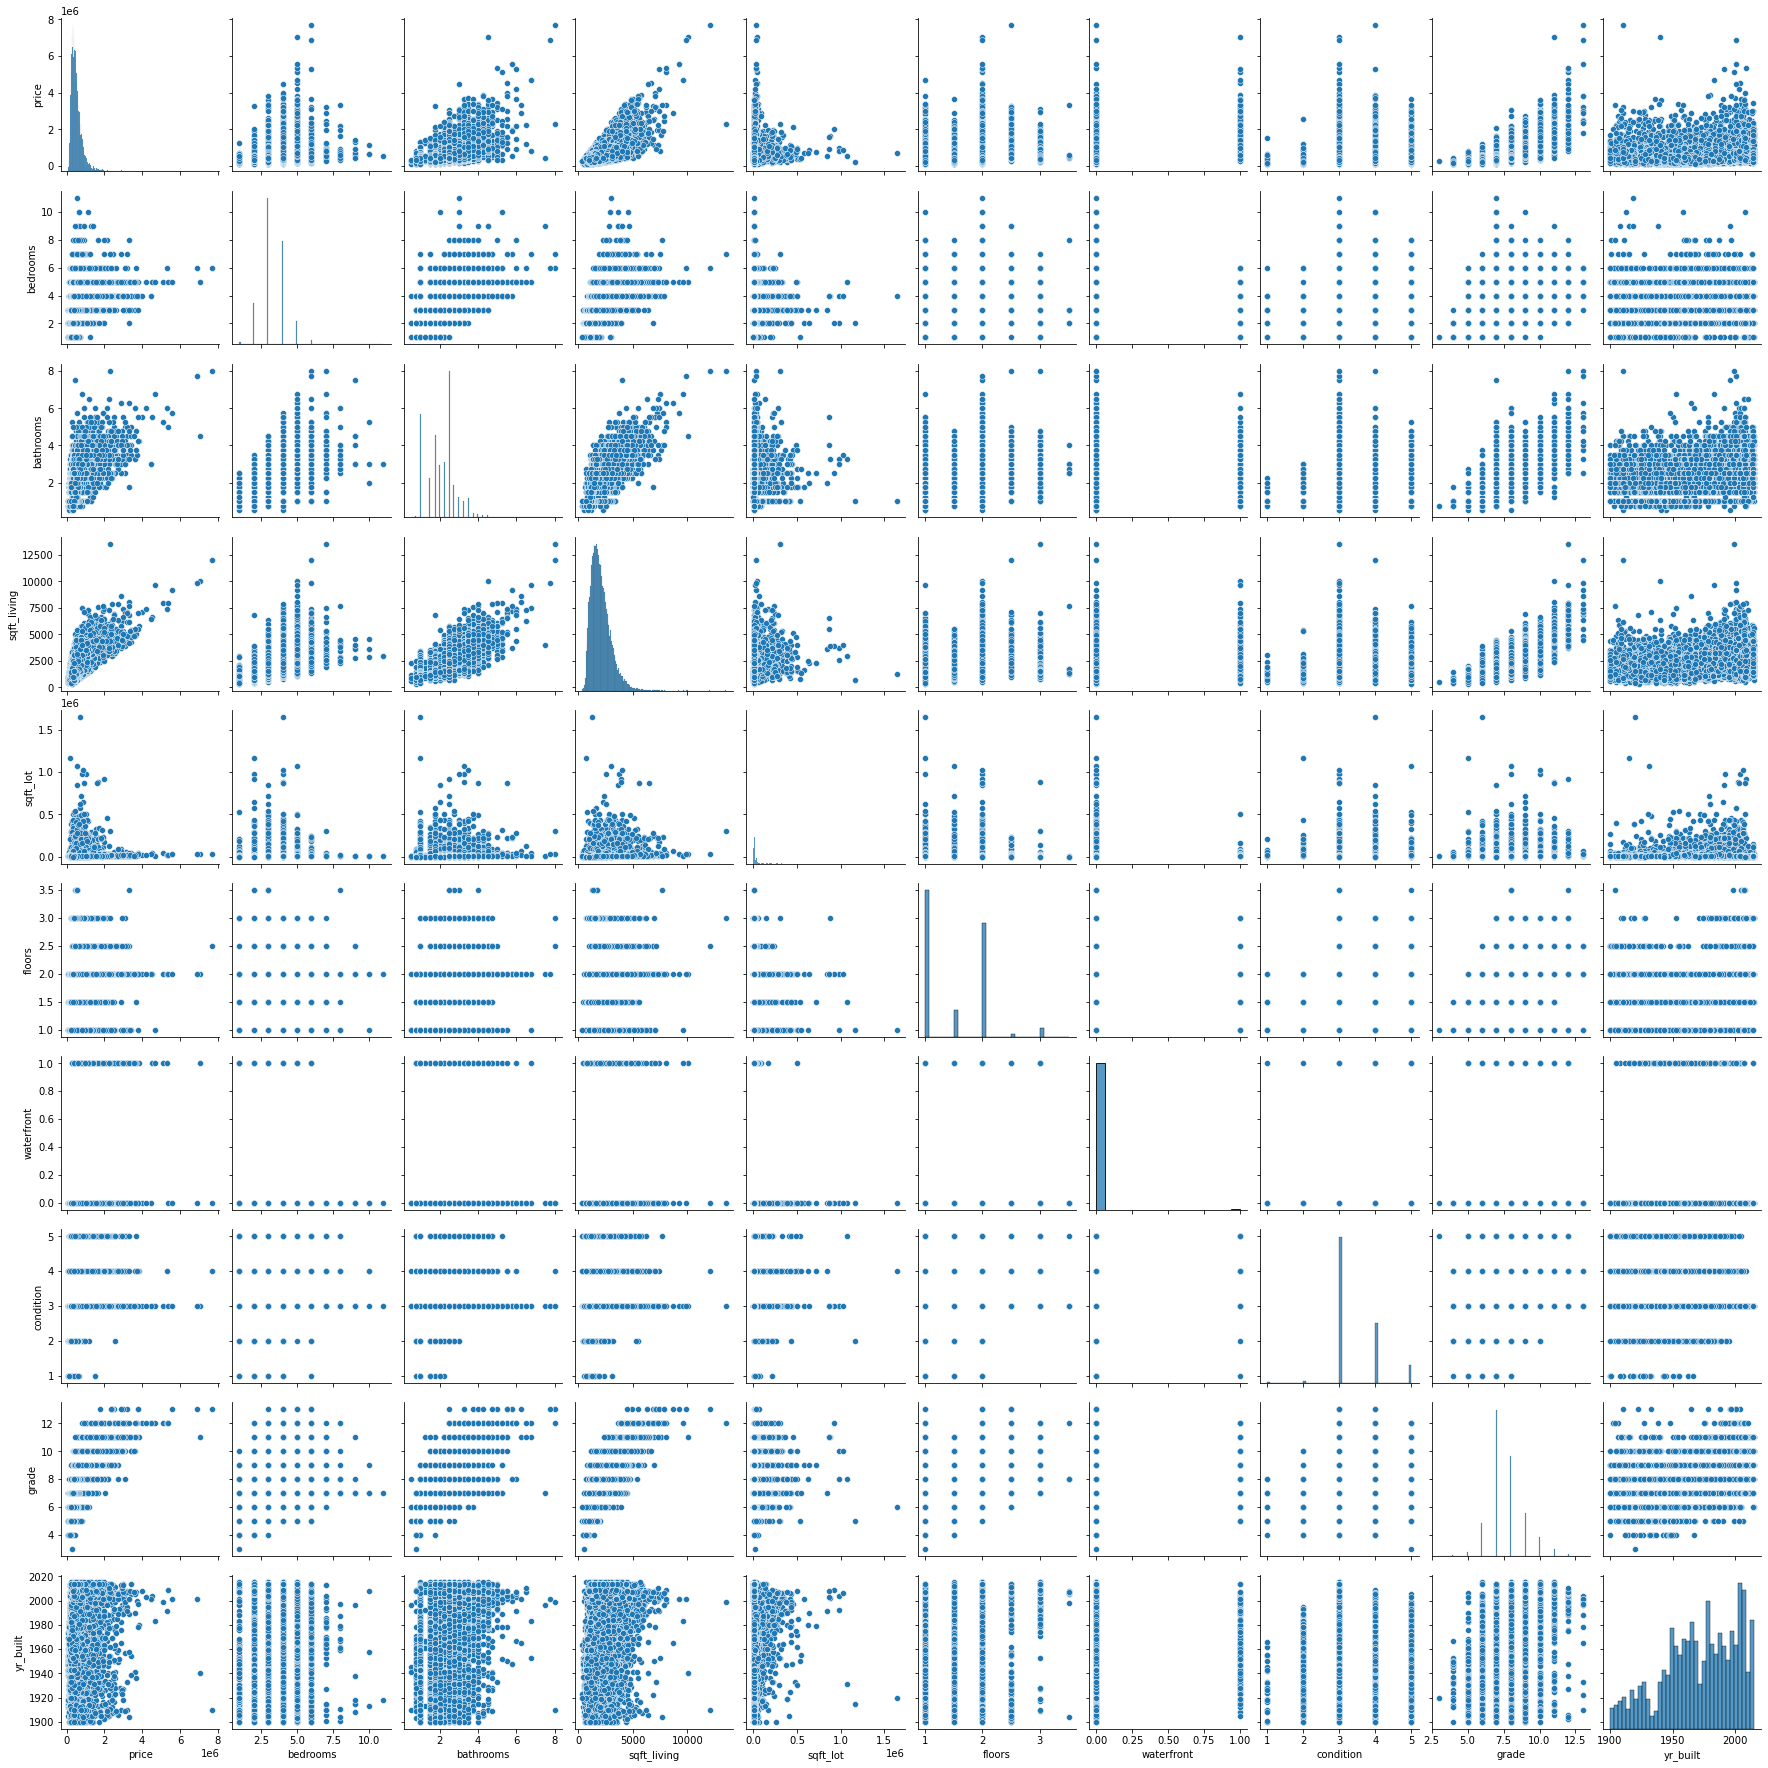

In [28]:
sns.pairplot(data);

In [29]:
data.nunique()

price          3607
bedrooms         11
bathrooms        29
sqft_living    1034
sqft_lot       9776
floors            6
waterfront        2
condition         5
grade            11
yr_built        116
dtype: int64

> Seems like we have the following in:
>
> Continues variables:
>- price
>- sqft_living
>- sqft_lot
>
> Categorical variables:
>- bedrooms
>- bathrooms
>- floors
>- waterfront
>- condition
>- grade
>- yr_built

In [30]:
# I feel like bathrooms has too much categories, checking
data['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [31]:
# narrowing it down to whole numbers
data['bathrooms'] = data['bathrooms'].round().astype(int)

In [32]:
data['bathrooms'].unique()

array([1, 2, 3, 4, 5, 6, 0, 7, 8])

In [33]:
# Same as the yr_built, checking
unique_years = data['yr_built'].unique()
np.sort(unique_years)

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015])

In [34]:
# Narrowing it down to a 3 bins categorised by half century
# Convert yr_built;
# 1900 to 1950 = yr_1900-1950
# 1951 to 2000 = yr_1951-1900
# 2001 to 2015 = yr_2001-2015

def half_cent(year):
    if 1899 < year < 1951:
        return 1
    elif 1950 < year < 2000:
        return 2
    else: return 3

In [35]:
data['yr_built'] = data['yr_built'].apply(half_cent)

In [36]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
7129300520,221900.0,3,1,1180,5650,1.0,0,3,7,2
6414100192,538000.0,3,2,2570,7242,2.0,0,3,7,2
5631500400,180000.0,2,1,770,10000,1.0,0,3,6,1
2487200875,604000.0,4,3,1960,5000,1.0,0,5,7,2
1954400510,510000.0,3,2,1680,8080,1.0,0,3,8,2
...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2,1530,1131,3.0,0,3,8,3
6600060120,400000.0,4,2,2310,5813,2.0,0,3,8,3
1523300141,402101.0,2,1,1020,1350,2.0,0,3,7,3
291310100,400000.0,3,2,1600,2388,2.0,0,3,8,3


In [37]:
# rounding off floors
data['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [38]:
data['floors'] = data['floors'].round().astype(int)

In [39]:
data.nunique()

price          3607
bedrooms         11
bathrooms         9
sqft_living    1034
sqft_lot       9776
floors            4
waterfront        2
condition         5
grade            11
yr_built          3
dtype: int64

>Now, we have the following in:
>
>Continues variables:
>- price
>- sqft_living
>- sqft_lot
>
>Categorical variables:
>- bedrooms
>- bathrooms
>- floors
>- waterfront
>- grade
>- yr_built

> Seems like I am satisfied with our exploratory data analysis (EDA). Now, let's proceed to build our first iteration.

---
### Iteration 1

In [40]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built'],
      dtype='object')

In [41]:
# Creating new df to avoid messing with the original one
df1 = data.copy()

In [42]:
# creating dummies of categorical variables
bedr_dummies = pd.get_dummies(df1['bedrooms'], prefix='bedr', drop_first=True)
bathr_dummies = pd.get_dummies(df1['bathrooms'], prefix='bathr', drop_first=True)
floors_dummies = pd.get_dummies(df1['floors'], prefix='floors', drop_first=True)
waterfr_dummies = pd.get_dummies(df1['waterfront'], prefix='waterfr', drop_first=True)
cond_dummies = pd.get_dummies(df1['condition'], prefix='cond', drop_first=True)
grade_dummies = pd.get_dummies(df1['grade'], prefix='grade', drop_first=True)
yr_built_dummies = pd.get_dummies(df1['yr_built'], prefix='yr_built', drop_first=True)

In [43]:
# dropping off columns
df1 = df1.drop(['bedrooms','bathrooms','floors','waterfront','condition','grade','yr_built'], axis=1)

In [44]:
# combining new data and the dummy columns
df1 = pd.concat([df1, bedr_dummies, bathr_dummies, floors_dummies, waterfr_dummies, cond_dummies, grade_dummies, yr_built_dummies], axis=1)

In [45]:
# making the first iteration
Y = 'price'
X1 = df1.drop(['price'], axis = 1)
X1_columns = "+".join(X1.columns)

In [46]:
ols_formula = Y + "~" + X1_columns

OLS = ols(formula = ols_formula, data = df1)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1101.
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:40:41   Log-Likelihood:            -2.9292e+05
No. Observations:               21420   AIC:                         5.859e+05
Df Residuals:                   21379   BIC:                         5.863e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.847e+04   2.39e+05     -0.077      0.938   -4.87e+05     4.5e+05
sqft_living   151.5138      3.303     45.867      0.000     145.039     157.989
sqft_lot       -0.2761      0.036     -7.742      0.000      -0.346      -0.206
bedr_2       -673.3283   1.62e+04     -0.042      0.967   -3.24e+04     3.1e+04
bedr_3      -2.299e+04   1.62e+04     -1.418      0.156   -5.48e+04    8779.180
bedr_4      -5.323e+04   1.65e+04     -3.219      0.001   -8.56e+04   -2.08e+04
bedr_5      -4.011e+04   1.74e+04     -2.302      0.021   -7.43e+04   -5961.333
bedr_6      -7.174e+04   2.13e+04     -3.371      0.001   -1.13e+05      -3e+04
bedr_7      -1.499e+05   3.87e+04     -3.872      0.000   -2.26e+05    -7.4e+04
bedr_8       7.978e+04   6.14e+04      1.299      0.194   -4.06e+04       2e+05
bedr_9      -3.613e+05   8.97e+04     -4.027      0.000   -5.37e+05   -1.85e+05
bedr_10     -1.332e+05   1.23e+05     -1.082      0.279   -3.75e+05    1.08e+05
bedr_11     -2.357e+05   2.11e+05     -1.115      0.265    -6.5e+05    1.78e+05
bathr_1       1.07e+05   1.05e+05      1.015      0.310   -9.96e+04    3.14e+05
bathr_2       1.05e+05   1.05e+05      0.996      0.319   -1.02e+05    3.12e+05
bathr_3      1.438e+05   1.06e+05      1.362      0.173   -6.31e+04    3.51e+05
bathr_4      1.995e+05   1.06e+05      1.887      0.059   -7776.118    4.07e+05
bathr_5      4.745e+05    1.1e+05      4.332      0.000     2.6e+05    6.89e+05
bathr_6      5.969e+05   1.15e+05      5.170      0.000    3.71e+05    8.23e+05
bathr_7      2.999e+05   1.84e+05      1.626      0.104   -6.17e+04    6.61e+05
bathr_8      1.682e+06   1.56e+05     10.779      0.000    1.38e+06    1.99e+06
floors_2    -2.243e+04   3639.384     -6.164      0.000   -2.96e+04   -1.53e+04
floors_3     7.115e+04   9664.579      7.362      0.000    5.22e+04    9.01e+04
floors_4     1.348e+05   8.02e+04      1.680      0.093   -2.24e+04    2.92e+05
waterfr_1    7.467e+05   1.78e+04     42.064      0.000    7.12e+05    7.82e+05
cond_2      -1.936e+04   4.32e+04     -0.448      0.654   -1.04e+05    6.53e+04
cond_3       6654.5043   4.01e+04      0.166      0.868    -7.2e+04    8.53e+04
cond_4       4.796e+04   4.01e+04      1.195      0.232   -3.07e+04    1.27e+05
cond_5       9.829e+04   4.04e+04      2.435      0.015    1.92e+04    1.77e+05
grade_4      2.266e+04   2.15e+05      0.106      0.916   -3.98e+05    4.43e+05
grade_5      1.718e+04   2.11e+05      0.081      0.935   -3.97e+05    4.32e+05
grade_6      7.694e+04   2.11e+05      0.364      0.716   -3.37e+05    4.91e+05
grade_7      1.929e+05   2.11e+05      0.913      0.361   -2.21e+05    6.07e+05
grade_8      2.933e+05   2.11e+05      1.388      0.165   -1.21e+05    7.07e+05
grade_9      4.359e+05   2.11e+05      2.063      0.039    2.18e+04     8.5e+05
grade_10     6.108e+05   2.11e+05      2.88

> - **Skew**  = 1.866 indicates the model is positively skewed
> - **Kurtosis** = 20.806 suggests that the residuals in the OLS regression model have heavy tails, which can have implications for the validity of the model's assumptions and the reliability of its results. Further investigation and potentially some adjustments to the model or data preprocessing may be necessary to address this issue and improve the model's performance.
>
>Also, the R-squared and Adjusted R-squared values are very close to each other, indicating that the inclusion of independent variables in the model does not significantly affect the model's explanatory power. This suggests that the independent variables included in the model are collectively explaining a substantial portion (about 67.4% to 67.5%) of the variance in the dependent variable.
>
>We will address these issues while working to improve our R-squared and Adjusted R-squared values.

**Distribution and KDE**

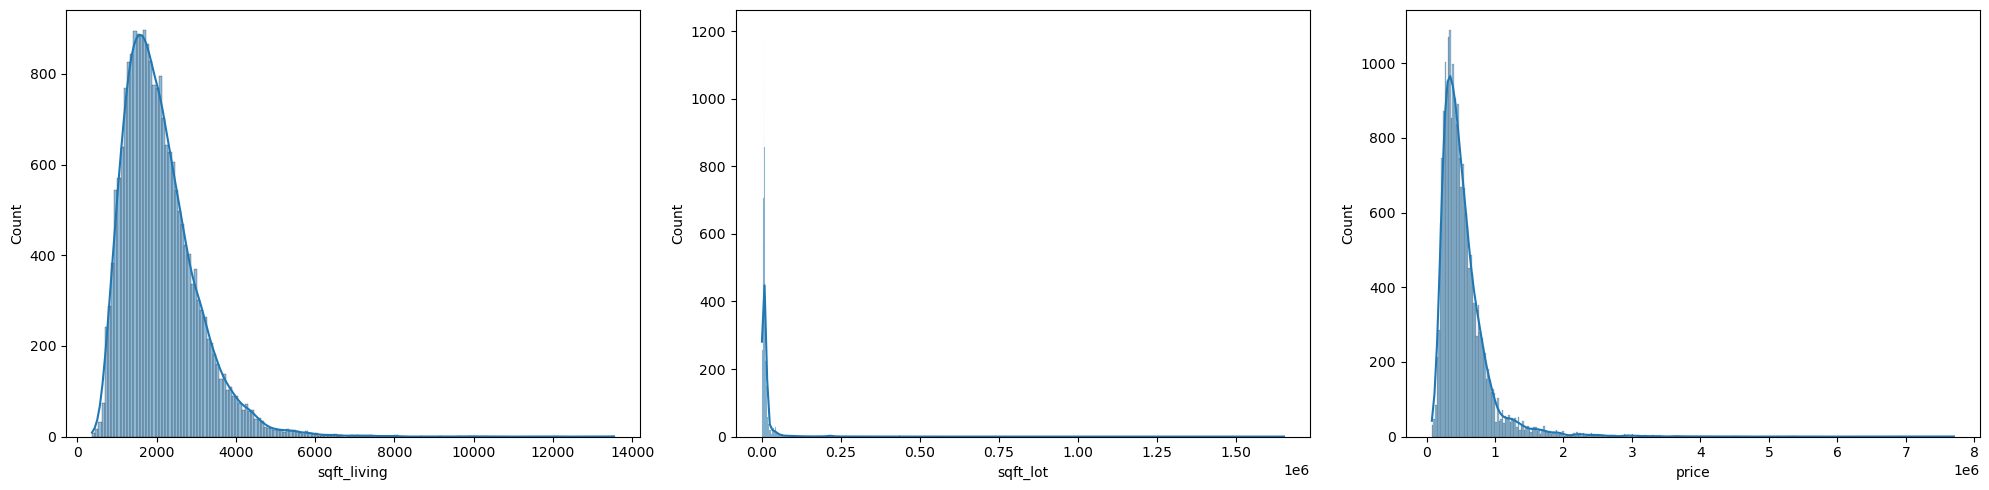

In [40]:
fig, axes = plt.subplots(1, 3, figsize = (20,5))
columns = ['sqft_living', 'sqft_lot','price']

sns.histplot(data=df1, x="sqft_living", kde=True, ax=axes[0])
sns.histplot(data=df1, x="sqft_lot", kde=True, ax=axes[1])
sns.histplot(data=df1, x="price", kde=True, ax=axes[2])

plt.tight_layout()
plt.show()

>We have positive skewness in our continuous variables
>
>- price
>- sqft_living
>- sqft_lot
>
>Positive skewness means that the tails of the distributions for these variables are longer on the right side (toward higher values), and most of the data points are concentrated on the left side (toward lower values).

**Model assumption: Linearity**

Identify which variables have a linear relationship with the target variable price

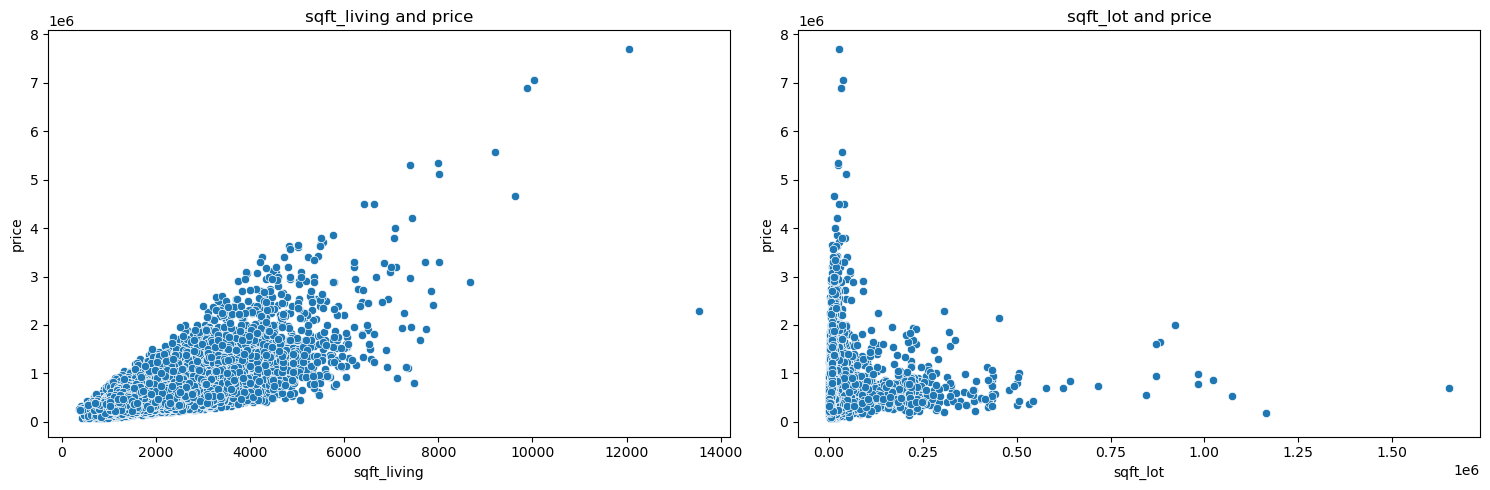

In [41]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

sns.scatterplot(x = df1['sqft_living'], y = df1['price'],ax=axes[0])
axes[0].set_title("sqft_living and price")

sns.scatterplot(x = df1['sqft_lot'], y = df1['price'],ax=axes[1])
axes[1].set_title("sqft_lot and price")

plt.tight_layout()
plt.show()

>* sqft_living shows a strong linear relationship with price.
>* sqft_lot shows a weak linear relationship with price.

**Model assumption: Normality**

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

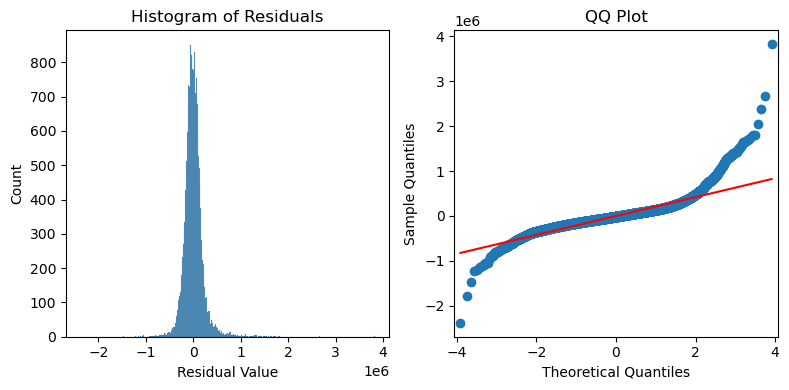

In [42]:
# Calculate the residuals.
residuals = model.resid

fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("QQ Plot")

plt.tight_layout()
plt.show()

>- I observe a mild positive skewness in the histogram, as well as heavier tails compared to the normal distribution
>- The residuals in the Q-Q plot appear to align quite closely with a straight line, indicating approximate normality. However, it's worth investigating the larger residuals to assess potential outliers.

**Model assumption: Constant variance**

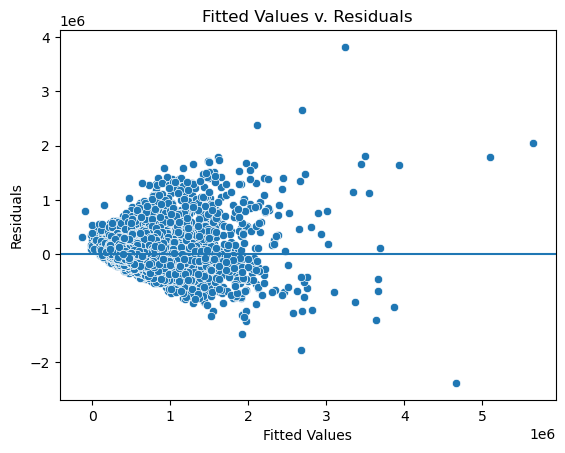

In [43]:
# Create a scatterplot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")
fig.axhline(0)

plt.show()

>The variance of the residuals increases with X, indicating a violation of the constant variance assumption.

**Model assumption: No multicollinearity**

In [44]:
# Calculate the variance inflation factor (optional).

# variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# subset of the data with the continous independent variables. 
X = df1[['sqft_living','sqft_lot']]

# variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
sqft_living,1.167323
sqft_lot,1.167323


> Given that both "sqft_living" and "sqft_lot" have VIF values close to 1, it suggests that they are not highly correlated with each other or with other predictor variables in your regression model. This is a positive finding, as it indicates that multicollinearity is not a significant concern for these particular variables.

We will explore correlation.

In [45]:
df1.corr()

,price,sqft_living,sqft_lot,bedr_2,bedr_3,bedr_4,bedr_5,bedr_6,bedr_7,bedr_8,...,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,yr_built_2,yr_built_3
price,1.000000,0.701875,0.089111,-0.145404,-0.184011,0.177128,0.190248,0.089011,0.047059,0.037799,...,-0.208278,-0.317488,0.003728,0.235306,0.340775,0.357400,0.292087,0.212325,-0.100325,0.113261
sqft_living,0.701875,1.000000,0.172586,-0.350934,-0.273668,0.352851,0.299061,0.149544,0.086769,0.046049,...,-0.311195,-0.360944,0.069881,0.318132,0.369381,0.345557,0.238121,0.144833,0.021300,0.226022
sqft_lot,0.089111,0.172586,1.000000,-0.027689,-0.015101,0.026349,0.011697,0.010002,0.005799,-0.003653,...,-0.018592,-0.067563,-0.024240,0.049805,0.073639,0.075682,0.062056,0.007759,0.085375,-0.037862
bedr_2,-0.145404,-0.350934,-0.027689,1.000000,-0.349184,-0.262357,-0.108211,-0.042829,-0.016132,-0.009430,...,0.270069,0.017202,-0.085358,-0.109047,-0.077794,-0.049404,-0.020205,-0.009430,-0.224389,-0.024574
bedr_3,-0.184011,-0.273668,-0.015101,-0.349184,1.000000,-0.625604,-0.258034,-0.102129,-0.038468,-0.022487,...,-0.024330,0.158394,0.007568,-0.102115,-0.091608,-0.086951,-0.045415,-0.018680,0.142396,-0.075508
bedr_4,0.177128,0.352851,0.026349,-0.262357,-0.625604,1.000000,-0.193872,-0.076734,-0.028903,-0.016895,...,-0.141184,-0.137792,0.057038,0.157623,0.112704,0.082025,0.031084,-0.004702,0.020274,0.083920
bedr_5,0.190248,0.299061,0.011697,-0.108211,-0.258034,-0.193872,1.000000,-0.031649,-0.011921,-0.006969,...,-0.067310,-0.060130,0.002657,0.064384,0.071250,0.071050,0.048736,0.036469,-0.003727,0.050126
bedr_6,0.089011,0.149544,0.010002,-0.042829,-0.102129,-0.076734,-0.031649,1.000000,-0.004718,-0.002758,...,-0.027149,-0.015405,0.014326,0.000981,0.015153,0.025399,0.012620,0.048689,0.014464,-0.024097
bedr_7,0.047059,0.086769,0.005799,-0.016132,-0.038468,-0.028903,-0.011921,-0.004718,1.000000,-0.001039,...,-0.009693,-0.010739,0.003163,-0.002115,0.014865,0.027157,0.014636,-0.001039,0.010026,-0.011798
bedr_8,0.037799,0.046049,-0.003653,-0.009430,-0.022487,-0.016895,-0.006969,-0.002758,-0.001039,1.000000,...,-0.007897,0.002328,0.001406,-0.003373,0.002664,-0.003382,0.028053,-0.000607,0.011365,-0.013144


In [46]:
abs(df1.corr()) > 0.75

,price,sqft_living,sqft_lot,bedr_2,bedr_3,bedr_4,bedr_5,bedr_6,bedr_7,bedr_8,...,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,yr_built_2,yr_built_3
price,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedr_2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedr_3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedr_4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedr_5,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedr_6,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
bedr_7,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
bedr_8,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [47]:
df=df1.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)

In [48]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(cond_4, cond_3)",0.813095


>The correlation coefficient between "cond_4" and "cond_3" is approximately 0.813095. This indicates a strong positive linear relationship or correlation between these two variables.

___
### Iteration 2

**Adjustments**: Addressing issues in Iteration 1 (First Model)
1. Despite sqft_lot's weak linear relationship with price, we retain it due to prior variable reductions in our smaller dataset.
2. We'll drop cond_4, cond_3 as we've seen in the correlation table.
3. Regarding normality, we will investigate the presence of outliers and take steps to address them.
4. We will apply Log Transformation to handle the distribution and skewness of our data.

In [49]:
# droppping 'cond_4', 'cond_3'
df2 = df1.drop(columns=['cond_4', 'cond_3'])

**Relevant continues variables vs the dependent variable**

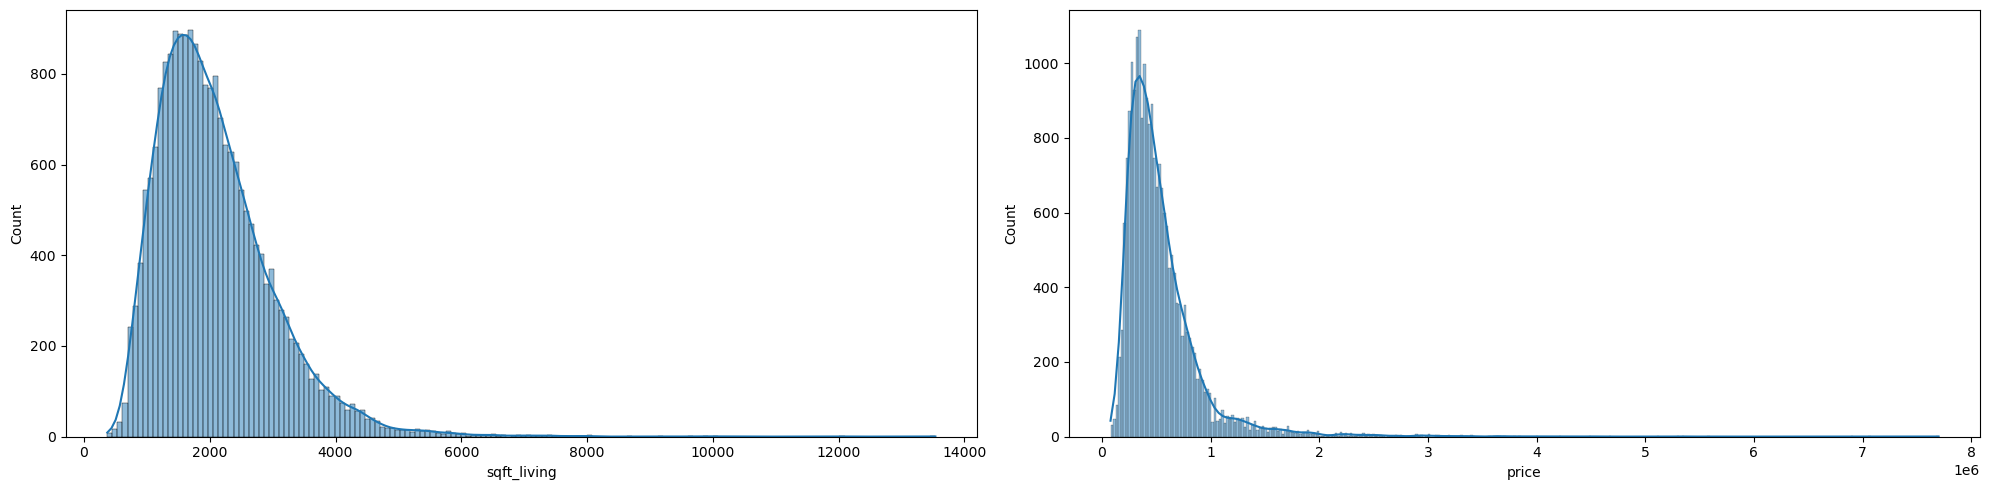

In [50]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))

sns.histplot(data=df2, x="sqft_living", kde=True, ax=axes[0])
sns.histplot(data=df2, x="price", kde=True, ax=axes[1])

plt.tight_layout()
plt.show()

> Rechecking the skewness in our continuous variables. We plot this to see the changes after log trasnformation. But before applying the log transformation, our next step is to address outliers in the data.

**Taking outliers**

In [51]:
# Taking outliers by reducing data size to 3 standard deviations

filter_cols = ['sqft_living', 'price', 'sqft_lot']

df2 = df2[~df2[filter_cols].apply(lambda x: np.abs(x - x.mean()) > 3 * x.std()).any(axis=1)]

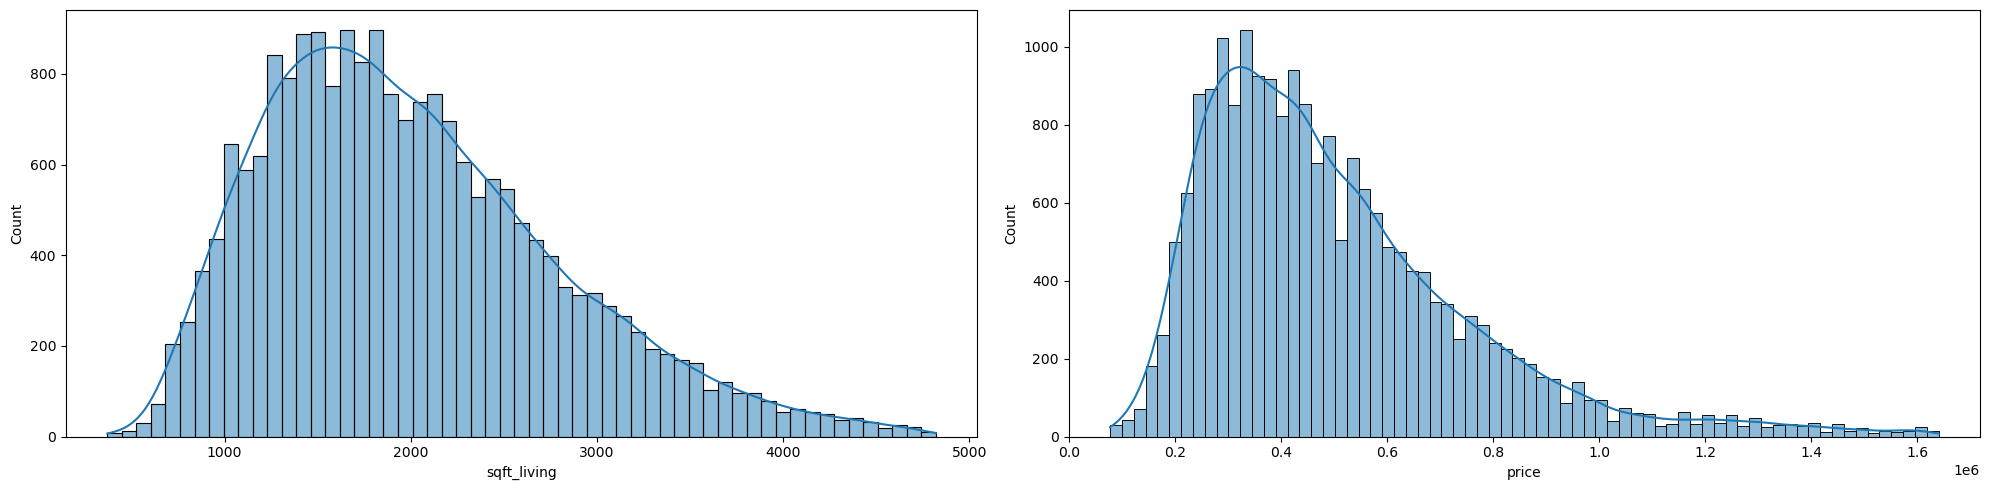

In [52]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))

sns.histplot(data=df2, x="sqft_living", kde=True, ax=axes[0])
sns.histplot(data=df2, x="price", kde=True, ax=axes[1])

plt.tight_layout()
plt.show()

>Simply by reducing the data size to exclude values beyond three standard deviations, we've observed an improvement in our dataset

**Log Transformation**

In [53]:
df2['sqft_living'] = np.log(df2['sqft_living'])
df2['price'] = np.log(df2['price'])

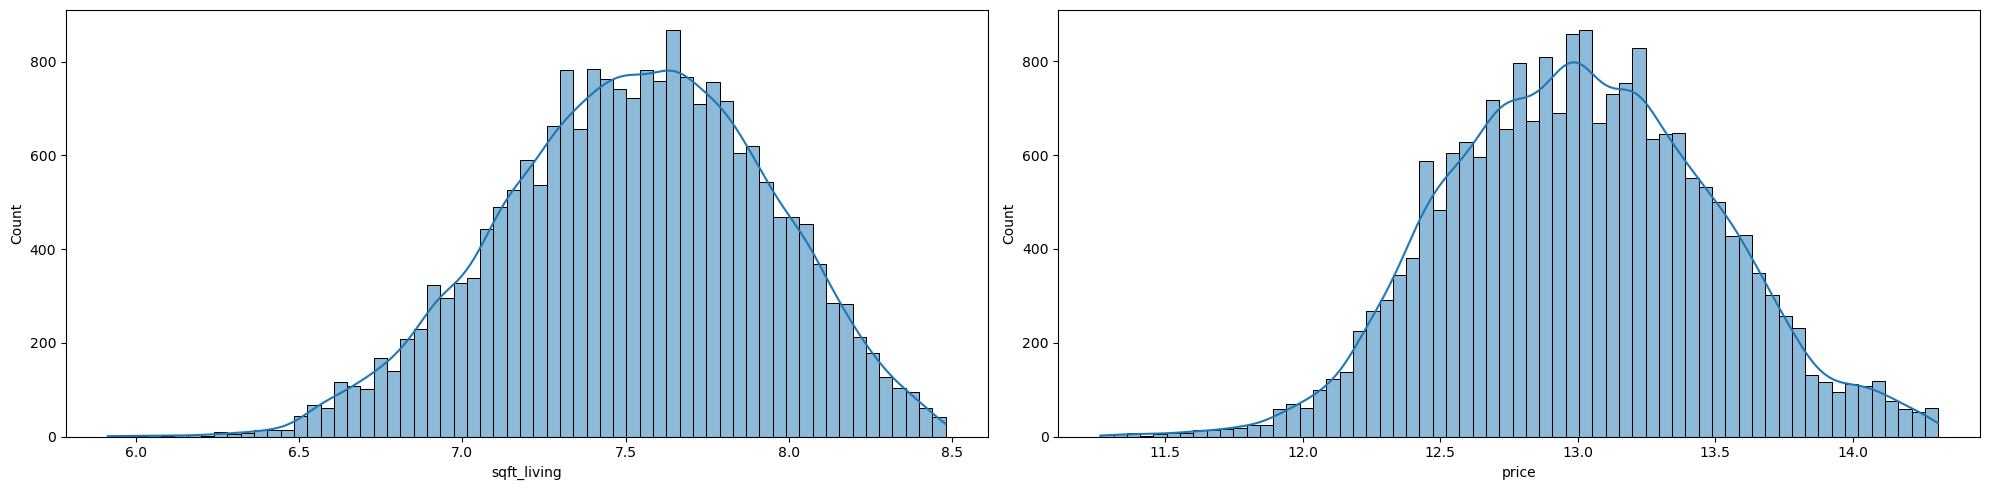

In [54]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))

sns.histplot(data=df2, x="sqft_living", kde=True, ax=axes[0])
sns.histplot(data=df2, x="price", kde=True, ax=axes[1])

plt.tight_layout()
plt.show()

> Applying a log transformation to our data has significantly improved its skewness

**Standardisation (Z-score Normalisation)**

Scaling and centering the data using Z-score normalization, also known as standard scaling

In [55]:
# normalize (subract mean and divide by std)

df2['sqft_living'] = (df2['sqft_living'] - df2['sqft_living'].mean()) / df2['sqft_living'].std()
df2['price'] = (df2['price'] - df2['price'].mean()) / df2['price'].std()

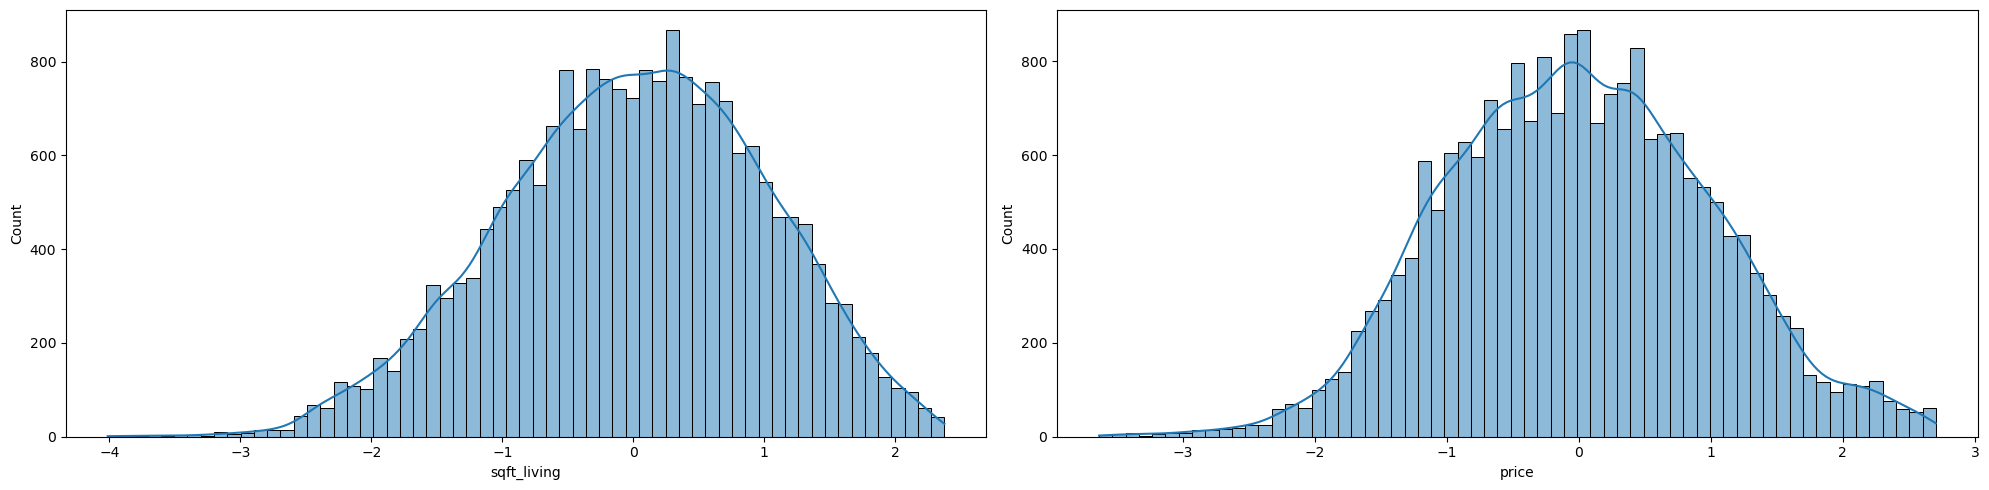

In [56]:
fig, axes = plt.subplots(1, 2, figsize = (20,5))

sns.histplot(data=df2, x="sqft_living", kde=True, ax=axes[0])
sns.histplot(data=df2, x="price", kde=True, ax=axes[1])

plt.tight_layout()
plt.show()

> It's important to note that standardization doesn't change the shape of the data's distribution; it only scales and centers the data.

In [57]:
# Doing the second iteration
X2 = df2.drop(['price'], axis = 1)
X2_columns = "+".join(X2.columns)

In [58]:
ols_formula = Y + "~" + X2_columns

OLS = ols(formula = ols_formula, data = df2)
model2 = OLS.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     804.7
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:18:09   Log-Likelihood:                -20157.
No. Observations:               20586   AIC:                         4.039e+04
Df Residuals:                   20549   BIC:                         4.068e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.8114      0.722     -1.124      0.261      -2.226       0.603
sqft_living     0.3788      0.009     42.198      0.000       0.361       0.396
sqft_lot    -1.001e-06   3.56e-07     -2.814      0.005    -1.7e-06   -3.04e-07
bedr_2         -0.1094      0.050     -2.177      0.029      -0.208      -0.011
bedr_3         -0.2666      0.051     -5.257      0.000      -0.366      -0.167
bedr_4         -0.3087      0.052     -5.923      0.000      -0.411      -0.207
bedr_5         -0.2781      0.055     -5.050      0.000      -0.386      -0.170
bedr_6         -0.3306      0.068     -4.832      0.000      -0.465      -0.196
bedr_7         -0.3816      0.136     -2.816      0.005      -0.647      -0.116
bedr_8         -0.2868      0.223     -1.288      0.198      -0.723       0.150
bedr_9         -0.1769      0.294     -0.602      0.547      -0.753       0.399
bedr_10         0.1333      0.380      0.351      0.726      -0.612       0.879
bedr_11        -0.7249      0.647     -1.120      0.263      -1.994       0.544
bathr_1         0.6864      0.323      2.126      0.034       0.054       1.319
bathr_2         0.7310      0.323      2.263      0.024       0.098       1.364
bathr_3         0.8523      0.323      2.636      0.008       0.218       1.486
bathr_4         0.9700      0.324      2.994      0.003       0.335       1.605
bathr_5         0.8866      0.363      2.443      0.015       0.175       1.598
bathr_6        -0.0860      0.732     -0.118      0.906      -1.521       1.349
bathr_7      1.602e-13   1.46e-13      1.097      0.273   -1.26e-13    4.46e-13
bathr_8         0.4005      0.777      0.515      0.606      -1.123       1.924
floors_2       -0.0534      0.011     -4.710      0.000      -0.076      -0.031
floors_3        0.2892      0.030      9.585      0.000       0.230       0.348
floors_4        0.3362      0.264      1.275      0.202      -0.181       0.853
waterfr_1       0.9312      0.074     12.584      0.000       0.786       1.076
cond_2         -0.3905      0.053     -7.369      0.000      -0.494      -0.287
cond_5          0.2253      0.017     13.059      0.000       0.191       0.259
grade_4        -0.4636      0.657     -0.705      0.481      -1.752       0.825
grade_5        -0.4213      0.648     -0.650      0.515      -1.691       0.848
grade_6         0.0067      0.647      0.010      0.992      -1.261       1.275
grade_7         0.6034      0.647      0.933      0.351      -0.665       1.872
grade_8         1.0820      0.647      1.672      0.095      -0.187       2.351
grade_9         1.5662      0.647      2.419      0.016       0.297       2.835
grade_10        1.8866      0.648      2.912      0.004       0.617       3.156
grade_11        2.1460      0.649      3.306      0.001       0.874       3.418
grade_12        2.4253      0.662      3.66

> As we dropped some features, there was a reduction in both the R-squared and adjusted R-squared values. However, this step allowed us to successfully improve the skewness of our data. It's worth noting that the kurtosis value of 3.300 suggests that the data may exhibit slightly heavier tails compared to a normal distribution, although this departure from normality is not highly pronounced

**Model assumption: Linearity**

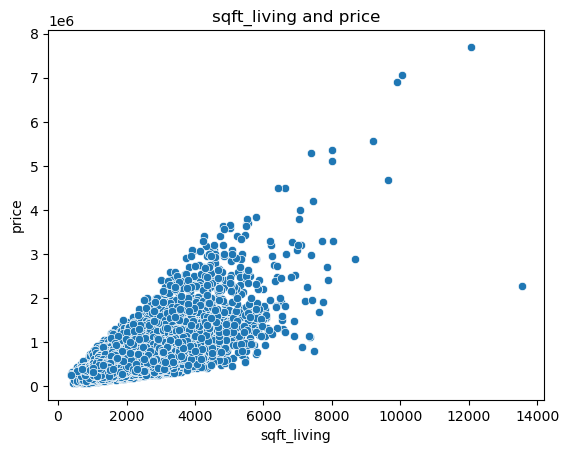

In [59]:
fig = sns.scatterplot(x = df1['sqft_living'], y = df1['price'])
fig.set_title("sqft_living and price")

plt.show()

>The relationship between sqft_living and price continues to exhibit a strong linear correlation.

**Model assumption: Normality**

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

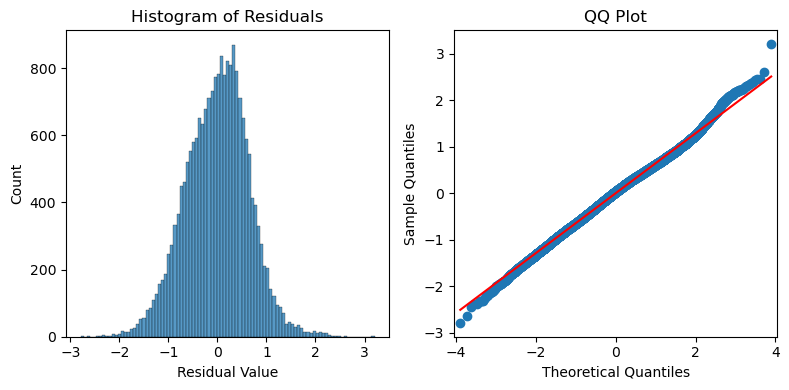

In [60]:
# Calculate the residuals.
residuals = model2.resid

fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("QQ Plot")

plt.tight_layout()
plt.show()

>- The histogram of residuals has shown significant improvement, with a notable reduction in heavy tails.
>- Also, the QQ plot now exhibits a smoother and closer alignment between sample quantiles and theoretical quantiles, forming a more linear relationship.
>- But the QQ plot displays some data points that could potentially be outliers

**Model assumption: Constant variance**

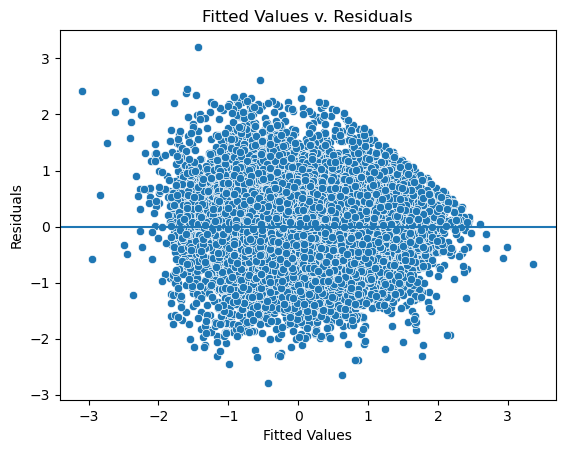

In [61]:
fig = sns.scatterplot(x = model2.fittedvalues, y = model2.resid)

fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")
fig.axhline(0)

plt.show()

>The scattered variance aligns with the homoscedasticity assumptions

**Model assumption: No multicollinearity**

In [62]:
df2.corr()

,price,sqft_living,sqft_lot,bedr_2,bedr_3,bedr_4,bedr_5,bedr_6,bedr_7,bedr_8,...,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,yr_built_2,yr_built_3
price,1.000000,0.630802,0.100389,-0.175266,-0.172025,0.229912,0.155009,0.054669,0.019474,0.009703,...,-0.318627,-0.318701,0.159188,0.345456,0.309631,0.189261,0.077060,NaN,-0.114352,0.135145
sqft_living,0.630802,1.000000,0.211168,-0.450103,-0.206560,0.413036,0.262806,0.112545,0.045301,0.027338,...,-0.400988,-0.300736,0.193076,0.360491,0.310124,0.185281,0.070070,NaN,0.089245,0.212097
sqft_lot,0.100389,0.211168,1.000000,-0.080162,-0.018813,0.061550,0.027746,0.010126,0.002489,-0.004794,...,-0.025726,-0.086527,-0.022008,0.072837,0.117852,0.087119,0.039233,NaN,0.238833,-0.170095
bedr_2,-0.175266,-0.450103,-0.080162,1.000000,-0.359625,-0.263873,-0.105973,-0.040926,-0.014336,-0.008124,...,0.267468,0.009710,-0.091283,-0.110037,-0.070783,-0.038685,-0.012705,NaN,-0.231717,-0.021442
bedr_3,-0.172025,-0.206560,-0.018813,-0.359625,1.000000,-0.628897,-0.252568,-0.097540,-0.034167,-0.019362,...,-0.029141,0.148323,-0.002103,-0.108135,-0.079513,-0.061208,-0.015370,NaN,0.138154,-0.066845
bedr_4,0.229912,0.413036,0.061550,-0.263873,-0.628897,1.000000,-0.185321,-0.071570,-0.025070,-0.014207,...,-0.140657,-0.132936,0.065000,0.164536,0.108497,0.077242,0.016164,NaN,0.026256,0.079417
bedr_5,0.155009,0.262806,0.027746,-0.105973,-0.252568,-0.185321,1.000000,-0.028743,-0.010068,-0.005705,...,-0.064806,-0.048150,0.014432,0.067903,0.061360,0.033659,0.020353,NaN,0.004786,0.042107
bedr_6,0.054669,0.112545,0.010126,-0.040926,-0.097540,-0.071570,-0.028743,1.000000,-0.003888,-0.002203,...,-0.026395,-0.005276,0.021328,0.004401,-0.002482,-0.001745,-0.003446,NaN,0.022194,-0.030562
bedr_7,0.019474,0.045301,0.002489,-0.014336,-0.034167,-0.025070,-0.010068,-0.003888,1.000000,-0.000772,...,-0.007542,-0.002579,0.008475,0.002694,-0.001603,-0.003809,-0.001207,NaN,0.012830,-0.016224
bedr_8,0.009703,0.027338,-0.004794,-0.008124,-0.019362,-0.014207,-0.005705,-0.002203,-0.000772,1.000000,...,-0.006811,0.010114,0.002056,-0.007694,-0.004523,-0.002159,-0.000684,NaN,0.009935,-0.011006


In [63]:
abs(df2.corr()) > 0.75

,price,sqft_living,sqft_lot,bedr_2,bedr_3,bedr_4,bedr_5,bedr_6,bedr_7,bedr_8,...,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,yr_built_2,yr_built_3
price,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedr_2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedr_3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedr_4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedr_5,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedr_6,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
bedr_7,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
bedr_8,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [64]:
df=df2.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)

In [65]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,


> There are no two highly correlated independent variables, which is in line with the assumption of no multicollinearity

---
### Iteration 3


>We will initiate another iteration to address the minor outlier issues and subsequently compare the results.

In [66]:
df3 = df2.copy()

In [67]:
# Reduce outliers by reducing data size to 2 standard deviations

column= ['price', 'sqft_living']

df3 = df3[~df3[column].apply(lambda x: np.abs(x - x.mean()) > 2 * x.std()).any(axis=1)]

In [68]:
X3 = df3.drop(['price'], axis = 1)
X3_columns = "+".join(X3.columns)

In [69]:
ols_formula = Y + "~" + X3_columns

OLS = ols(formula = ols_formula, data = df3)
model3 = OLS.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     577.3
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:18:10   Log-Likelihood:                -17402.
No. Observations:               18974   AIC:                         3.488e+04
Df Residuals:                   18938   BIC:                         3.516e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0702      0.330      0.213      0.832      -0.576       0.717
sqft_living     0.3514      0.009     39.062      0.000       0.334       0.369
sqft_lot    -3.243e-07   3.51e-07     -0.925      0.355   -1.01e-06    3.63e-07
bedr_2         -0.0155      0.075     -0.206      0.837      -0.163       0.132
bedr_3         -0.1639      0.075     -2.182      0.029      -0.311      -0.017
bedr_4         -0.1996      0.076     -2.635      0.008      -0.348      -0.051
bedr_5         -0.2009      0.078     -2.585      0.010      -0.353      -0.049
bedr_6         -0.1896      0.087     -2.171      0.030      -0.361      -0.018
bedr_7         -0.2093      0.146     -1.436      0.151      -0.495       0.076
bedr_8         -0.0047      0.229     -0.021      0.983      -0.454       0.444
bedr_9         -0.0019      0.359     -0.005      0.996      -0.705       0.701
bedr_10         0.2273      0.436      0.522      0.602      -0.626       1.081
bedr_11        -0.5706      0.611     -0.934      0.350      -1.768       0.627
bathr_1         0.5716      0.351      1.629      0.103      -0.116       1.260
bathr_2         0.5789      0.351      1.649      0.099      -0.109       1.267
bathr_3         0.6903      0.351      1.965      0.049       0.002       1.379
bathr_4         0.7808      0.352      2.218      0.027       0.091       1.471
bathr_5         0.6535      0.397      1.645      0.100      -0.125       1.432
bathr_6        -0.2377      0.711     -0.334      0.738      -1.632       1.157
bathr_7      5.645e-16   1.55e-15      0.364      0.716   -2.48e-15    3.61e-15
bathr_8         0.2193      0.783      0.280      0.779      -1.316       1.754
floors_2       -0.0475      0.011     -4.333      0.000      -0.069      -0.026
floors_3        0.2786      0.029      9.533      0.000       0.221       0.336
floors_4        0.3373      0.248      1.361      0.174      -0.149       0.823
waterfr_1       0.7200      0.088      8.195      0.000       0.548       0.892
cond_2         -0.3295      0.059     -5.609      0.000      -0.445      -0.214
cond_5          0.1988      0.017     11.679      0.000       0.165       0.232
grade_4        -1.7496      0.550     -3.180      0.001      -2.828      -0.671
grade_5        -1.1839      0.107    -11.029      0.000      -1.394      -0.973
grade_6        -0.7889      0.095     -8.337      0.000      -0.974      -0.603
grade_7        -0.2468      0.094     -2.636      0.008      -0.430      -0.063
grade_8         0.2159      0.094      2.306      0.021       0.032       0.399
grade_9         0.6479      0.094      6.884      0.000       0.463       0.832
grade_10        0.9032      0.096      9.415      0.000       0.715       1.091
grade_11        1.0998      0.109     10.119      0.000       0.887       1.313
grade_12        1.1726      0.550      2.13

> We didn't achieve substantial improvements apart from slighty improvements on skewness and kurtosis. However, both the R-squared and the adjusted R-squared decreased in value.

**Model assumption: Normality**

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

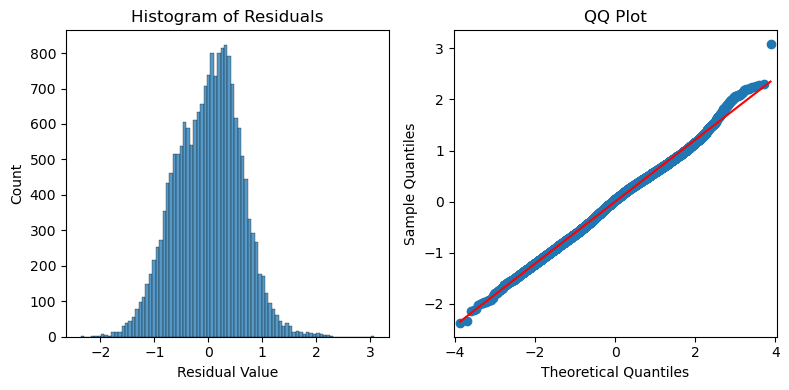

In [70]:
# Calculate the residuals.
residuals = model3.resid

fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("QQ Plot")

plt.tight_layout()
plt.show()

>- The histogram of residuals continues to exhibit normality. 
>- Additionally, the QQ plot still reveals some data points that might be considered potential outliers.

> Since we haven't seen significant improvements, I'm planning to use our second model for validation. This choice is because the second model has higher R-squared and adjusted R-squared values compared to the third model. Additionally, it successfully satisfies all the assumption requirements essential for multiple linear 

---
### Model Validation

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = df2.drop('price', axis=1)
y = df2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

Train Mean Squared Error: 0.41300310594141654
Test Mean Squared Error:  0.4218969728995109


> Since the training and testing MSE values are quite close, it suggests that the model is achieving a reasonable balance between fitting the training data and generalizing to unseen data. This is a positive sign, indicating that the model is not strongly overfitting or underfitting the data. 

In [72]:
# Using K-Fold Cross Validation to verify

X = df2.drop('price', axis=1)
y = df2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

scoring = {'mse': 'neg_mean_squared_error'}
results = cross_validate(linreg, X, y, scoring=scoring, cv=10)

test_mse_scores = -results['test_mse']

train_predictions = linreg.predict(X)
train_mse = mean_squared_error(y, train_predictions)

print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse_scores.mean())

Train Mean Squared Error: 0.4152267886983053
Test Mean Squared Error: 0.41653353912899027


> The K-Fold Cross-Validation consistently shows that the model maintains a small difference between training and testing Mean Squared Error (MSE) values. This indicates a balanced approach, where the model effectively learns from the training data while generalizing well to unseen data. This result is encouraging, as it suggests the model neither overfits nor underfits the dataset but rather provides a robust fit to the underlying patterns, instilling confidence in its predictive performance

In [73]:
# Display model 2 summary for interpretation
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     804.7
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:18:11   Log-Likelihood:                -20157.
No. Observations:               20586   AIC:                         4.039e+04
Df Residuals:                   20549   BIC:                         4.068e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.8114      0.722     -1.124      0.261      -2.226       0.603
sqft_living     0.3788      0.009     42.198      0.000       0.361       0.396
sqft_lot    -1.001e-06   3.56e-07     -2.814      0.005    -1.7e-06   -3.04e-07
bedr_2         -0.1094      0.050     -2.177      0.029      -0.208      -0.011
bedr_3         -0.2666      0.051     -5.257      0.000      -0.366      -0.167
bedr_4         -0.3087      0.052     -5.923      0.000      -0.411      -0.207
bedr_5         -0.2781      0.055     -5.050      0.000      -0.386      -0.170
bedr_6         -0.3306      0.068     -4.832      0.000      -0.465      -0.196
bedr_7         -0.3816      0.136     -2.816      0.005      -0.647      -0.116
bedr_8         -0.2868      0.223     -1.288      0.198      -0.723       0.150
bedr_9         -0.1769      0.294     -0.602      0.547      -0.753       0.399
bedr_10         0.1333      0.380      0.351      0.726      -0.612       0.879
bedr_11        -0.7249      0.647     -1.120      0.263      -1.994       0.544
bathr_1         0.6864      0.323      2.126      0.034       0.054       1.319
bathr_2         0.7310      0.323      2.263      0.024       0.098       1.364
bathr_3         0.8523      0.323      2.636      0.008       0.218       1.486
bathr_4         0.9700      0.324      2.994      0.003       0.335       1.605
bathr_5         0.8866      0.363      2.443      0.015       0.175       1.598
bathr_6        -0.0860      0.732     -0.118      0.906      -1.521       1.349
bathr_7      1.602e-13   1.46e-13      1.097      0.273   -1.26e-13    4.46e-13
bathr_8         0.4005      0.777      0.515      0.606      -1.123       1.924
floors_2       -0.0534      0.011     -4.710      0.000      -0.076      -0.031
floors_3        0.2892      0.030      9.585      0.000       0.230       0.348
floors_4        0.3362      0.264      1.275      0.202      -0.181       0.853
waterfr_1       0.9312      0.074     12.584      0.000       0.786       1.076
cond_2         -0.3905      0.053     -7.369      0.000      -0.494      -0.287
cond_5          0.2253      0.017     13.059      0.000       0.191       0.259
grade_4        -0.4636      0.657     -0.705      0.481      -1.752       0.825
grade_5        -0.4213      0.648     -0.650      0.515      -1.691       0.848
grade_6         0.0067      0.647      0.010      0.992      -1.261       1.275
grade_7         0.6034      0.647      0.933      0.351      -0.665       1.872
grade_8         1.0820      0.647      1.672      0.095      -0.187       2.351
grade_9         1.5662      0.647      2.419      0.016       0.297       2.835
grade_10        1.8866      0.648      2.912      0.004       0.617       3.156
grade_11        2.1460      0.649      3.306      0.001       0.874       3.418
grade_12        2.4253      0.662      3.66

---
### Interpretretation

- For each additional square foot of living space, the estimated property price increases by 378.80 .
- Each additional bathroom adds approximately 686.40 USD to the property price.
- Properties with a waterfront view command a premium of 931,200 USD.
- A property with a grade of 10, compared to a grade of 3, is estimated to be worth 1,886,600 USD more.
- Older properties, built in 1900, may be valued at 678.20 USD less compared to more recent ones.

---
### Conclusion

- Property size, bedrooms, bathrooms, floors, waterfront views, condition, grade, and year built significantly influence property prices in King County.
- Waterfront views, higher grades, more bathrooms, and newer properties tend to command higher prices.
- The number of bedrooms, lot size, and condition 2 can reduce property values.
- Historical year built is associated with property value, with older properties generally valued lower.

---
### Recommendations:

- Develop a user-friendly online tool that allows users to estimate property values based on the regression model's coefficients. Provide an intuitive interface for easy access.

- Incorporate real-time data to provide users with up-to-date market trend analysis, helping them make timely investment decisions.

- Offer on-demand consultations with real estate experts who can provide personalized advice based on the regression model's insights.

- Provide educational content on the platform to help users understand the factors affecting property prices and how to use the valuation tool effectively.

- Consider offering premium subscription services for advanced features, including historical data access and investment strategy recommendations.

---
### Future Work:

In the pursuit of continuous improvement, future iterations of this project will involve incorporating all available features from the dataset to further enhance the predictive accuracy of the model. 

Additionally, there is a potential avenue for exploring the impact of various amenities, such as proximity to schools, parks, and transportation hubs, on property prices. This expanded scope will provide a more comprehensive understanding of the King County real estate market and ensure that the "King County Real Estate Pricing and Investment Advisor" remains an invaluable resource for all real estate stakeholders.